<a href="https://colab.research.google.com/github/theopenhighway/machinelearning-zoomcamp/blob/main/2_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction Project**

Machine Learning Zoomcamp - Week 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Cleaning

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
for cols in strings:
    df[cols] = df[cols].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [ ]:
for cols in df.columns:
  print(cols)
  print(df[cols].unique()[:5])
  print(df[cols].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Distribution of Price

In [ ]:
import matplotlib.pyplot as ply
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

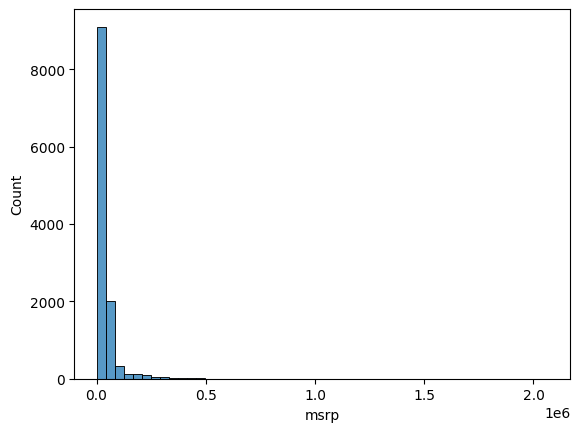

In [ ]:
# long tail distribution
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

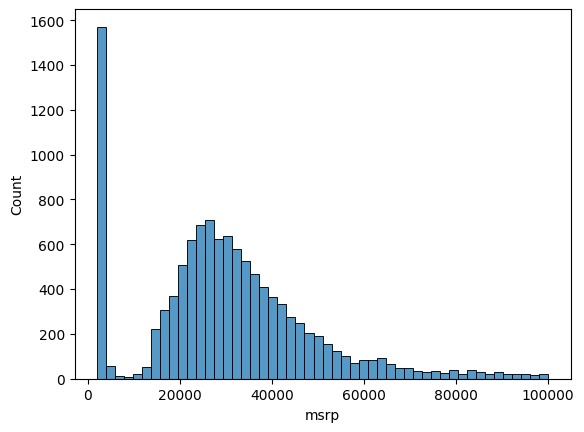

In [ ]:
# not so good dataset
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [ ]:
# logarithmic distribution
# can't start from zero
np.log([1,10,1000,1000000])

# solution: adding 1 (+1) to every value
np.log1p([0,1,10,1000,1000000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 13.81551156])

In [ ]:
priceLogs = np.log1p(df.msrp)
priceLogs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

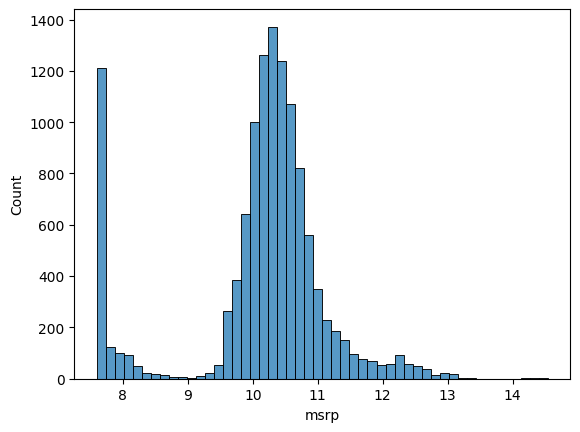

In [ ]:
# closer to normal distribution
sns.histplot(priceLogs, bins=50)

## Missing Values

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting Up Validation Framework

### Split dataframe
Train 60%, VAL 20%, test 20%

In [ ]:
n = len(df)
nVal = int(n*0.2)
nTest = int(n*0.2)
nTrain = n - nVal - nTest

In [ ]:
n, nVal + nTest + nTrain

(11914, 11914)

In [ ]:
nVal, nTest, nTrain

(2382, 2382, 7150)

In [ ]:
dfTrain = df.iloc[nTrain:]
dfVal = df.iloc[nTrain:nTrain+nVal]
dfTest = df.iloc[nVal+nTrain:]

In [ ]:
dfVal

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


In [ ]:
dfTest

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
9532,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,47575
9533,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,31940
9534,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385,38335
9535,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385,35870
9536,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385,28155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [ ]:
dfTrain

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


### Shuffle Dataset

In [ ]:
idx = np.arange(n)

In [ ]:
np.random.seed(2)
np.random.shuffle(idx)

In [ ]:
dfTrain = df.iloc[idx[:nTrain]]
dfVal = df.iloc[idx[nTrain:nTrain+nVal]]
dfTest = df.iloc[idx[nVal+nTrain:]]

In [ ]:
dfTrain=dfTrain.reset_index(drop=True)
dfVal=dfVal.reset_index(drop=True)
dfTest=dfTest.reset_index(drop=True)

In [ ]:
yTrain = np.log1p(dfTrain.msrp.values)
yVal = np.log1p(dfVal.msrp.values)
yTest = np.log1p(dfTest.msrp.values)

In [ ]:
del dfTrain['msrp']
del dfVal['msrp']
del dfTest['msrp']

## Linear Regression

In [ ]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.07]

In [ ]:
def linearRegression(xi):
  n = len(xi)
  pred = w0

  for j in range(n):
    pred = pred + w[j] *xi[j]

  return pred

In [ ]:
linearRegression(xi)

18.16

In [ ]:
# converts from logarithmic to actual value
np.exp(12.312)

222348.2221101062

Vector Form

In [ ]:
def dot(xi,w):
  n = len(xi)
  res = 0.0

  for j in range(n):
    res = res + xi[j] * w[j]
  return res

In [ ]:
wNew = [w0] + w

def linearRegression(xi):
  xi = [1] + xi
  return dot(xi,wNew)

linearRegression(xi)

18.16

In [ ]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.07]
wNew = [w0] + w

In [ ]:
x1 = [1,148,24,1385]
x2 = [1,132,24,1385]
x10 = [1,453,11,86]

X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

In [ ]:
X.dot(wNew)

array([106.56, 106.4 ,  18.16])

## Training a Linear Regression Model

In [ ]:
y = [10000,20000,15000,25000,10000,20000,15000,25000,12000]

In [ ]:
X = [[148,24,1385],
      [132,24,2031],
     [453,11,86],
     [158,24,185],
      [172,25,201],
     [413,11,86],
     [38,54,185],
      [142,25,431],
     [453,31,86],
]


X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   24, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [ ]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.400e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [ ]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.290000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.398300e+04, 7.185400e+05],
       [2.290000e+02, 4.398300e+04, 7.097000e+03, 1.167720e+05],
       [4.676000e+03, 7.185400e+05, 1.167720e+05, 6.359986e+06]])

In [ ]:
XTXinv = np.linalg.inv(XTX)

In [ ]:
wFull = XTXinv.dot(X.T).dot(y)
wFull

array([ 3.03382352e+04, -2.32450842e+01, -2.64486135e+02, -2.44929629e+00])

In [ ]:
w0 = wFull[0]
w = wFull[1:]

In [ ]:
w0,w

(30338.235198357783, array([ -23.24508418, -264.48613455,   -2.44929629]))

In [ ]:
def trainLinRegres(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTXinv = np.linalg.inv(XTX)
  wFull = XTXinv.dot(X.T).dot(y)
  return wFull[0],wFull[1:]

## Car Price Baseline Model

In [ ]:
dfTrain

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [ ]:
dfTrain.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity' ]


In [ ]:
xTrain = dfTrain[base].values

In [ ]:
xTrain = dfTrain[base].fillna(0).values
xTrain

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [ ]:
w0,w = trainLinRegres(xTrain, yTrain)

In [ ]:
yPred = w0 + xTrain.dot(w)

<Axes: ylabel='Count'>

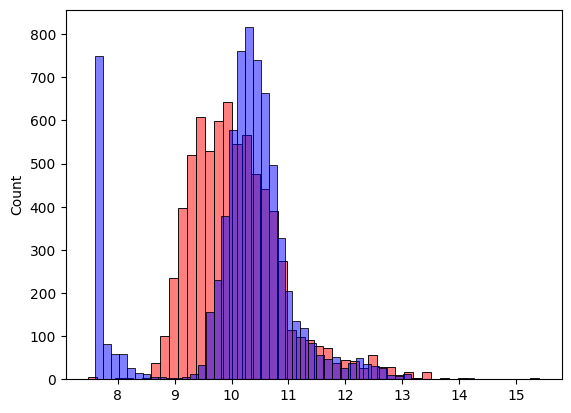

In [ ]:
sns.histplot(yPred,color='red', alpha=0.5,bins=50)
sns.histplot(yTrain, color='blue', alpha=0.5,bins=50)

## Root Mean Square Error (RMSE)

In [ ]:
def rmse(y,yPred):
  se = (y - yPred) **2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
rmse(yTrain,yPred)

0.7554192603920132

## Validating the Model

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity' ]
xTrain = dfTrain[base]
w0,w = trainLinRegres(xTrain, yTrain)
yPred = w0 + xTrain.dot(w)

In [ ]:
def prepareX(df):
  dfNum = df[base]
  dfNum = dfNum.fillna(0)
  X = dfNum.values

  return X

In [ ]:
xTrain2 = prepareX(dfTrain)
w0,w = trainLinRegres(xTrain2, yTrain)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

0.761653099130156

## Simple Feature Engineering

In [ ]:
2017 - dfTrain.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
def prepareX(df):
  # ensuring actual data frame doesnt get modified
  df = df.copy()
  df['age'] = 2017 - df.year
  features = base + ['age']
  dfNum = df[features]
  dfNum = dfNum.fillna(0)
  X = dfNum.values

  return X

In [ ]:
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegres(Xtrain, yTrain)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

0.5172055461058299

<Axes: ylabel='Count'>

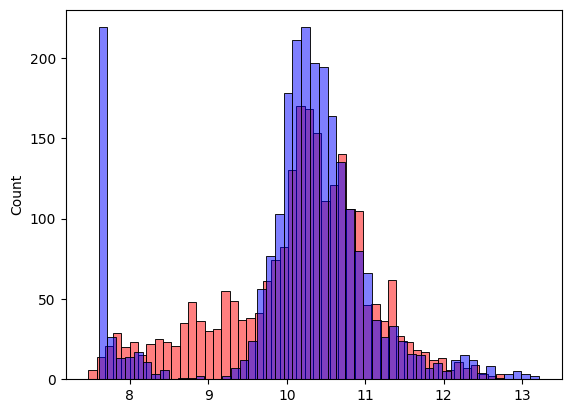

In [ ]:
sns.histplot(yPred2,color='red', alpha=0.5,bins=50)
sns.histplot(yVal, color='blue', alpha=0.5,bins=50)

## Categorical Variables

In [ ]:
for v in [2,3,4]:
  dfTrain['num_doors_%s' % v] = (dfTrain.number_of_doors == v).astype('int')

In [ ]:
dfTrain.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'num_doors_2', 'num_doors_3',
       'num_doors_4'],
      dtype='object')

In [ ]:
def prepareX(df):
  # ensuring actual data frame doesnt get modified
  df = df.copy()
  df['age'] = 2017 - df.year
  features = base.copy()
  features.append('age')

  for v in [2,3,4]:
    df['num_doors_%s' % v] = (dfTrain.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  dfNum = df[features]
  dfNum = dfNum.fillna(0)
  X = dfNum.values

  return X

In [ ]:
prepareX(dfTrain)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [ ]:
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegres(Xtrain, yTrain)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

0.5186588617185713

In [ ]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
def prepareX(df):
  # ensuring actual data frame doesnt get modified
  df = df.copy()
  features = base.copy()
  df['age'] = 2017 - df.year

  features.append('age')

  for v in [2,3,4]:
    df['num_doors_%s' % v] = (dfTrain.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  for v in makes:
    df['make_%s' % v] = (dfTrain.make == v).astype('int')
    features.append('make_%s' % v)

  dfNum = df[features]
  dfNum = dfNum.fillna(0)
  X = dfNum.values

  return X

In [ ]:
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegres(Xtrain, yTrain)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

0.5306449707685917

In [ ]:
categoriesVar = ['make','engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [ ]:
categories = {}

for c in categoriesVar:
  categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
def prepareX(df):
  # ensuring actual data frame doesnt get modified
  df = df.copy()
  features = base.copy()
  df['age'] = 2017 - df.year

  features.append('age')

  for v in [2,3,4]:
    df['num_doors_%s' % v] = (dfTrain.number_of_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  # for v in makes:
  #   df['make_%s' % v] = (dfTrain.make == v).astype('int')
  #   features.append('make_%s' % v)

  for c,values in categories.items():
    for v in values:
      df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
      features.append('%s_%s' % (c,v))

  dfNum = df[features]
  dfNum = dfNum.fillna(0)
  X = dfNum.values

  return X

In [ ]:
# model went wrong
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegres(Xtrain, yTrain)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

143.34678484203488

Regilarization

In [ ]:
X = [
  [4,4,4],
  [3,5,5],
  [5,1,1],
  [5,4,4],
  [7,5,5],
  [4,5,5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [ ]:
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [ ]:
XTXinv = np.linalg.int(XTX)

AttributeError: ignored

In [ ]:
def trainLinRegresRes(X,y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTXinv = np.linalg.inv(XTX)
  wFull = XTXinv.dot(X.T).dot(y)

  return wFull[0],wFull[1:]

In [ ]:
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegresRes(Xtrain, yTrain,r=0.01)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

rmse(yVal,yPred2)

0.4708490233635317

### Finding Best Regularization Parameter

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
  Xtrain = prepareX(dfTrain)
  w0,w = trainLinRegresRes(Xtrain, yTrain,r=r)
  xVal2 = prepareX(dfVal)

  yPred2 = w0 + xVal2.dot(w)

  score = rmse(yVal,yPred2)

  print(r, w0, score)

In [ ]:
r = 0.001
Xtrain = prepareX(dfTrain)
w0,w = trainLinRegresRes(Xtrain, yTrain,r=r)
xVal2 = prepareX(dfVal)

yPred2 = w0 + xVal2.dot(w)

score = rmse(yVal,yPred2)


score

0.4708556209434774

## Train the Final Model

In [ ]:
dfFullTrain = pd.concat([dfTrain, dfVal])

In [ ]:
dfFullTrain = dfFullTrain.reset_index(drop=True)
dfFullTrain.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0


In [ ]:
xFullTrain = prepareX(dfFullTrain)
xFullTrain

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [ ]:
yFullTrain = np.concatenate([yTrain,yVal])
yFullTrain

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [ ]:
w0,w = trainLinRegresRes(xFullTrain, yFullTrain,r=0.01)

In [ ]:
xTest = prepareX(dfTest)

yPred = w0 + xTest.dot(w)

score = rmse(yTest,yPred)
score

0.45719061701752084

In [ ]:
car = dfTest.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [ ]:
dfSmall = pd.DataFrame([car])
xSmall = prepareX(dfSmall)

In [ ]:
yPred = w0 + xSmall.dot(w)
yPred = yPred[0]
yPred

10.367465695910326

In [ ]:
np.expm1(yPred)

31806.764190803733